<a href="https://colab.research.google.com/github/marcelofschiavo/ds-cookbook/blob/main/03_Visualizacao_de_Dados_(EDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. Visualização de Dados (Análise Exploratória de Dados - EDA)

**Objetivo:** Números podem esconder a verdade. Gráficos a revelam. A Estatística Descritiva (Notebook 02) nos deu resumos (média, mediana), mas a Análise Exploratória de Dados (EDA) nos permite *ver* a história por trás desses números.

Usaremos a biblioteca **`seaborn`** (construída sobre o `matplotlib`) para criar gráficos estatísticos que nos ajudam a responder perguntas como:
1.  Qual é o *formato* (distribuição) dos nossos dados?
2.  Existem *outliers* (pontos fora da curva)?
3.  Como as variáveis *se relacionam* umas com as outras?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Vamos recriar o dataset do Notebook 02 para este ser independente
data = {
    'departamento': ['Vendas', 'Vendas', 'Vendas', 'Vendas', 'Vendas',
                     'TI', 'TI', 'TI', 'TI', 'TI',
                     'RH', 'RH',
                     'Diretoria'],
    'salario': [4000, 4500, 5000, 5200, 4800,
                8000, 8500, 9000, 7800, 9200,
                6000, 6100,
                150000],                        # O Outlier
    'idade': [25, 28, 33, 31, 29,
              40, 42, 38, 35, 45,
              30, 31,
              55]
}
df_empresa = pd.DataFrame(data)

# Configuração padrão para os gráficos ficarem mais bonitos
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6) # Define o tamanho padrão das figuras

print("--- DataFrame de Salários (com Outlier) ---")
print(df_empresa)

--- DataFrame de Salários (com Outlier) ---
   departamento  salario  idade
0        Vendas     4000     25
1        Vendas     4500     28
2        Vendas     5000     33
3        Vendas     5200     31
4        Vendas     4800     29
5            TI     8000     40
6            TI     8500     42
7            TI     9000     38
8            TI     7800     35
9            TI     9200     45
10           RH     6000     30
11           RH     6100     31
12    Diretoria   150000     55


### Receita 3.1: Histograma (`sns.histplot`) - *Para Variáveis Numéricas*

* **🧠 Intuição:** "Vamos ver o 'formato' dos salários. Os salários estão todos juntos? Tem mais gente ganhando pouco ou muito? O Histograma mostra as 'pilhas' de salários em diferentes faixas de valor."
* **🎓 Definição Técnica:** Visualiza a **distribuição** de uma variável numérica contínua. Ele agrupa os dados em 'bins' (faixas/barras) e conta a frequência (contagem) de observações em cada bin. O argumento `kde=True` (Kernel Density Estimation) desenha uma linha suave que estima a forma da distribuição.
* **🍳 Receita:**

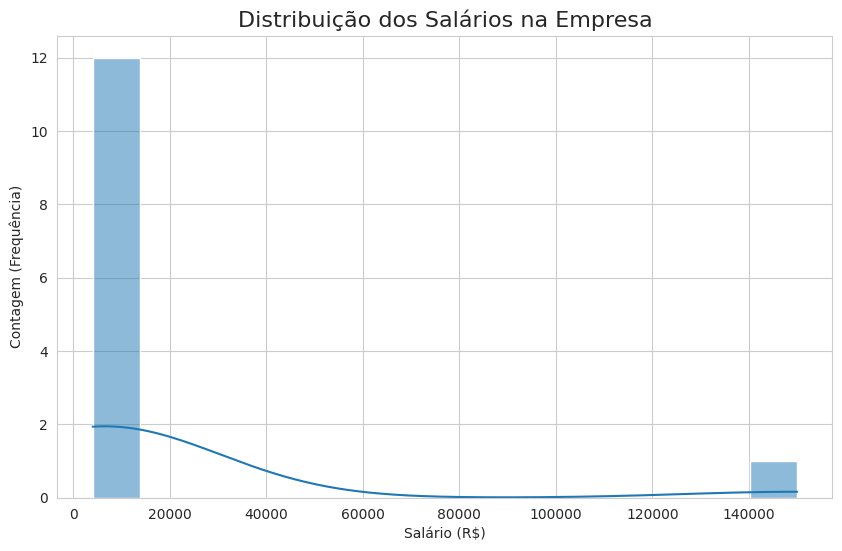

In [2]:
sns.histplot(data=df_empresa, x='salario', kde=True, bins=15)
plt.title('Distribuição dos Salários na Empresa', fontsize=16)
plt.xlabel('Salário (R$)')
plt.ylabel('Contagem (Frequência)')
plt.show() # plt.show() exibe o gráfico limpo

* **📊 Resultado:** Este gráfico deixa claro o que a Média (17.5k) e a Mediana (6.1k) nos contaram no Notebook 02.
    * A grande maioria dos funcionários está "espremida" nas barras da esquerda (abaixo de R$ 10.000).
    * Há um "deserto" e, em seguida, uma única barra minúscula lá na direita (R$ 150.000).
    * Isso é uma **distribuição assimétrica à direita** (right-skewed). O `kde=True` desenha a linha de densidade que confirma essa 'cauda longa'.

### Receita 3.2: Boxplot (`sns.boxplot`) - *Para Variáveis Numéricas*

* **🧠 Intuição:** "Um 'raio-x' da nossa coluna de salário. Ele mostra o 'miolo' (a caixa), a mediana (a linha no meio) e, o mais importante, os 'pontos fora da curva' (outliers)."
* **🎓 Definição Técnica:** Visualiza os cinco números-resumo (mínimo, Q1, Q2/Mediana, Q3, máximo) e outliers. A 'caixa' representa o Intervalo Interquartil (IQR, os 50% centrais dos dados). Os 'bigodes' (whiskers) estendem-se até 1.5 * IQR além de Q1 e Q3. Pontos além dos bigodes são plotados individualmente como outliers.
* **🍳 Receita:**

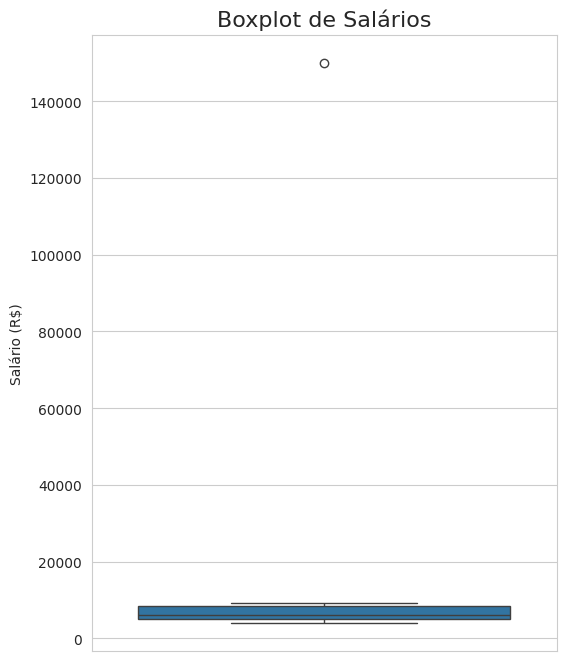

In [3]:
plt.figure(figsize=(6, 8)) # Ajustar o tamanho para um gráfico vertical
sns.boxplot(data=df_empresa, y='salario')
plt.title('Boxplot de Salários', fontsize=16)
plt.ylabel('Salário (R$)')
plt.show()

* **📊 Resultado:** Este gráfico é a *prova visual* do nosso outlier.
    * A "caixa" (o miolo de 50% dos funcionários) está toda espremida na parte de baixo, entre Q1 (4.9k) e Q3 (8.3k).
    * A linha laranja dentro da caixa é a Mediana (6.1k).
    * A "bolinha" (ponto) solitária lá em cima é o **outlier** (150k), pois ele caiu muito além do "bigode" superior.

### Receita 3.3: Gráfico de Barras (`sns.countplot`) - *Para Variáveis Categóricas*

* **🧠 Intuição:** "Quantas pessoas temos em cada departamento? Vamos *contar* e mostrar em barras. Simples e direto."
* **🎓 Definição Técnica:** Visualiza a **frequência** (contagem) de cada categoria única em uma variável categórica. É, na prática, um histograma para categorias.
* **🍳 Receita:**

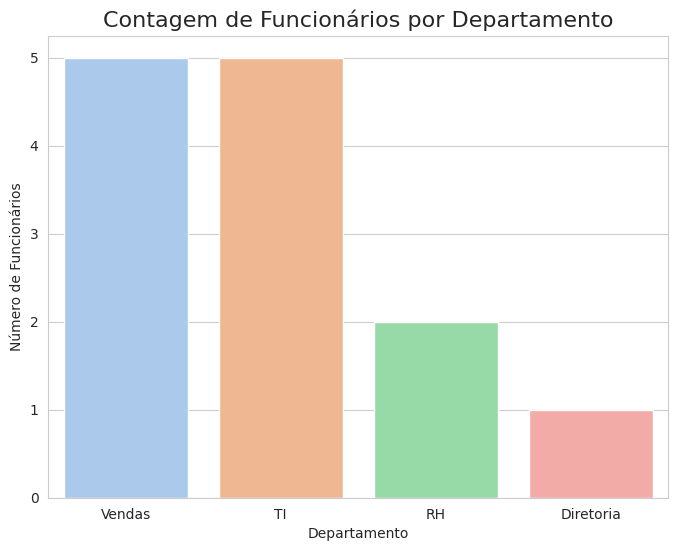

In [8]:
# Bônus: Usamos 'order' para ordenar as barras da mais frequente para a menos
ordem_frequencia = df_empresa['departamento'].value_counts().index

plt.figure(figsize=(8, 6))
sns.countplot(data=df_empresa,
              x='departamento',
              order=ordem_frequencia,
              palette='pastel',
              hue='departamento',  # Adiciona o mapeamento de cor
              legend=False)      # Esconde a legenda duplicada

plt.title('Contagem de Funcionários por Departamento', fontsize=16)
plt.xlabel('Departamento')
plt.ylabel('Número de Funcionários')
plt.show()

* **📊 Resultado:** Vemos que 'Vendas' e 'TI' são os departamentos mais frequentes (5 funcionários cada), seguidos por 'RH' (2) e 'Diretoria' (1). O argumento `order=...` é um truque útil para ordenar as barras da maior para a menor, tornando o gráfico mais fácil de ler. O gráfico fica idêntico ao anterior, mas o código agora está alinhado com as boas práticas do Seaborn e não gera o `FutureWarning`.

### Receita 3.4: Gráfico de Dispersão (`sns.scatterplot`) - *Relação entre 2 Numéricas*

* **🧠 Intuição:** "Será que quem é *mais velho* (eixo X) também tem *salário maior* (eixo Y)? O gráfico de dispersão plota um ponto para cada funcionário. Se os pontos formarem uma linha subindo, elas 'andam juntas' (correlação positiva)."
* **🎓 Definição Técnica:** Examina a *relação* (e correlação) entre duas variáveis numéricas contínuas. Cada ponto (marker) no gráfico representa uma observação (linha) no dataset. A forma do "enxame" de pontos revela o tipo de relação (linear, quadrática, etc.) e a direção (positiva, negativa).
* **🍳 Receita:**

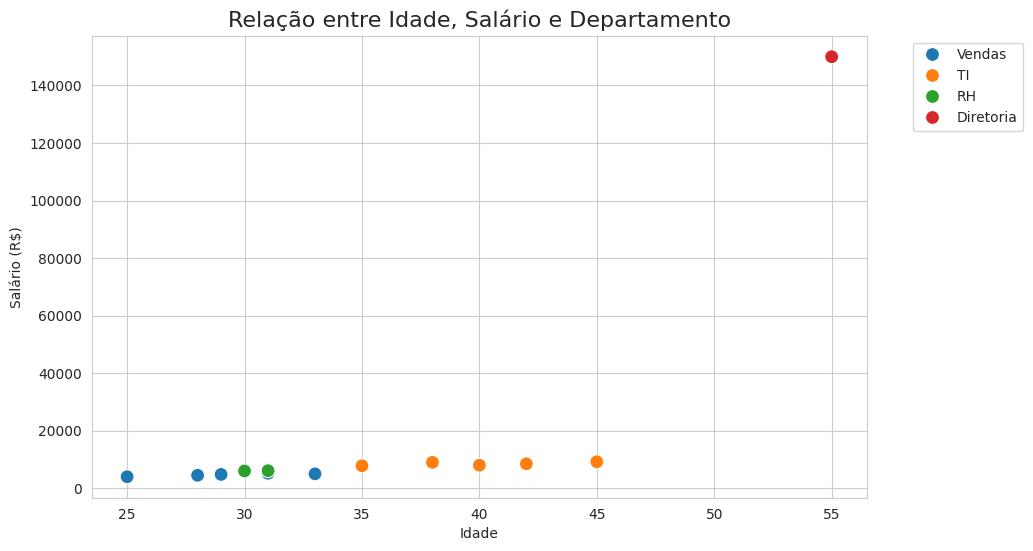

In [9]:
# Bônus: Usamos 'hue' para adicionar uma *terceira* variável (categórica) ao gráfico
sns.scatterplot(data=df_empresa, x='idade', y='salario', hue='departamento', s=100) # s=100 aumenta o tamanho dos pontos
plt.title('Relação entre Idade, Salário e Departamento', fontsize=16)
plt.xlabel('Idade')
plt.ylabel('Salário (R$)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2) # Coloca a legenda fora do gráfico
plt.show()

* **📊 Resultado (Explicado):** O gráfico mostra dois padrões claros:
    1.  Para o "enxame" principal de pontos (Vendas, TI, RH), há uma clara **tendência positiva**: quanto maior a idade, maior o salário.
    2.  O ponto da 'Diretoria' (150k, 55 anos) está muito distante do grupo, confirmando ser um outlier em termos de salário, mas seguindo a tendência de idade.
    * O uso de `hue='departamento'` nos permite ver que os pontos azuis (TI) estão, em geral, acima dos pontos laranjas (Vendas).

### Receita 3.5: Heatmap de Correlação (`sns.heatmap`) - *Relação entre Múltiplas Numéricas*

* **🧠 Intuição:** "Vamos fazer um 'resumão' de todos os `scatterplots` de uma vez. Este gráfico de calor nos mostra a 'nota' da correlação (de -1 a +1) entre *todas* as variáveis numéricas. Vermelho = forte relação positiva. Azul = forte relação oposta."
* **🎓 Definição Técnica:** Uma visualização gráfica de uma matriz de dados, onde os valores são representados por cores. Quando aplicado a uma **matriz de correlação** (`df.corr()`), ele permite identificar rapidamente a força e a direção das relações lineares entre múltiplas variáveis.
* **🍳 Receita:**

--- Matriz de Correlação ---
          salario     idade
salario  1.000000  0.734076
idade    0.734076  1.000000


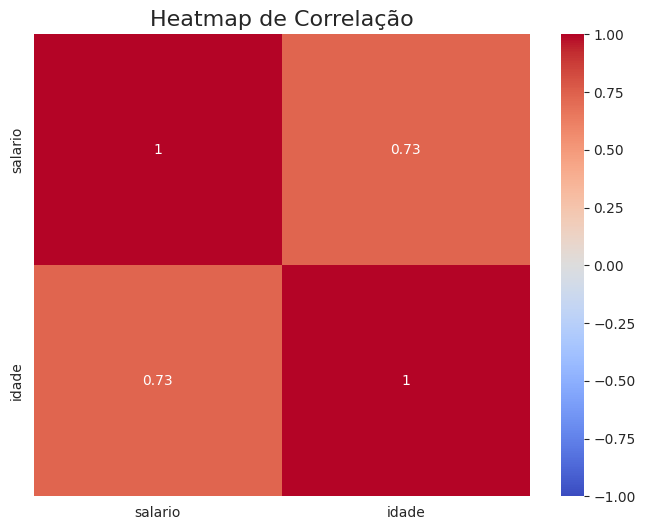

In [10]:
# 1. Calcular a Matriz de Correlação
# 1. O método .corr() calcula a Matriz de Correlação de Pearson.
#    Ele dá uma "nota" (o coeficiente) de -1 a +1 que mede se duas variáveis
#    "andam juntas" (relação linear).
# 2. numeric_only=True é crucial para o Pandas ignorar
#    automaticamente colunas de texto (como 'departamento') e rodar
#    apenas nas colunas 'salario' e 'idade'.
corr_matrix = df_empresa.corr(numeric_only=True)

print("--- Matriz de Correlação ---")
print(corr_matrix)

# 2. Plotar o Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix,
            annot=True,     # annot=True: escreve os números nos quadrados
            cmap='coolwarm',  # cmap='coolwarm': usa o mapa de cor azul-vermelho
            vmin=-1, vmax=1)  # vmin/vmax: fixa a legenda de -1 a +1
plt.title('Heatmap de Correlação', fontsize=16)
plt.show()

* **📊 Resultado:** A matriz e o gráfico mostram a "nota" da relação entre `idade` e `salario`.
    * O valor `0.73` (um vermelho forte) confirma a **forte correlação positiva** que vimos no scatterplot.
    * O `1.00` na diagonal é óbvio (cada variável tem correlação perfeita consigo mesma).
    * Se tivéssemos uma correlação negativa (ex: -0.7), o quadrado seria azul escuro. Este gráfico é a forma mais rápida de verificar quais variáveis "andam juntas" antes de construir um modelo de ML.